<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/kernelized_pca_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial: Visualizing Kernel PCA Projections and Projection Curves for 2D Datasets**

(Fayyaz Minhas)

In this tutorial, we will explore how kernel PCA transforms non-linear datasets and how to visualize projection curves using kernel PCA's kernelized projection function. We will break down the steps needed to generate the projections, understand the underlying mathematical representation, and visualize the resulting curves.

---

### **Key Concepts Covered**
1. **Kernel PCA with Non-linear Projections:**  
   Kernel PCA generalizes classical PCA by mapping input data into a higher-dimensional feature space using a kernel function. This allows it to capture complex non-linear structures.

2. **Kernelized Projection Function Representation:**  
   A key property of kernel PCA is that the projection of any data point $x$ along the $m$-th principal component can be expressed using the kernel function as:

   $$
   f_m(x) = \sum_i \alpha_{m,i} \, k(x, x_i)
   $$

   Here:
   - $f_m(x)$ is the projection of input $x$ onto the $m$-th component of the kernel PCA-transformed space.
   - $\alpha_{m,i}$ are coefficients determined by the eigenvectors of the kernel matrix.
   - $k(x, x_i)$ is the kernel function (e.g., RBF kernel) measuring the similarity between $x$ and the training point $x_i$.

   This representation highlights how each projection is a combination of kernelized similarities, making kernel PCA ideal for non-linear data.

3. **Projection Curves and Orthogonality:**  
   We will focus on **projection curves** that represent contours of constant projection values in the kernel PCA-transformed space. These curves show how kernel PCA organizes and separates data.

   - **Orthogonality in the Transformed Space:**  
     In the kernel PCA-transformed space (the feature space), the principal components are orthogonal by definition. This means the projections along different components are independent and orthogonal in that space.

   - **Loss of Orthogonality in the Original Space:**  
     When we visualize projection curves in the **original feature space**, the orthogonality does not hold. The non-linear kernel mapping distorts the geometry, resulting in projection curves that **intersect at various angles** rather than being orthogonal. This is a key characteristic of kernel PCA: while the separation of data improves, the resulting projections may have curved and complex interactions.

---

### **Steps to Follow**
1. **Data Generation:**  
   We create synthetic datasets using `make_circles` and `make_moons`, both of which are non-linearly separable.

2. **Applying Kernel PCA:**  
   Using the RBF kernel, we transform the data into a feature space where non-linear patterns become linear or more easily separable.

3. **Projection Function in Practice:**  
   For each point $x$, we compute its projection along the key components of the kernel PCA-transformed space using the learned coefficients $\alpha_{m,i}$. The projection is effectively a weighted sum of the kernel similarities to the training points.

4. **Plotting and Visualization:**  
   We use the custom function `plotit` to visualize the original and kernel PCA-transformed data, overlaying projection curves that show how the data is structured along the kernel PCA dimensions.

---

### **Core Functions Explained**
- **`plotit(X, Y, clf, ...)`**  
  A utility function to plot data, projection curves, and contours:
  - $X$: 2D feature data points.  
  - $Y$: Class labels (optional).  
  - `clf`: A projection or mapping function (e.g., kernel PCA component) to visualize the projection curves.  
  - Additional arguments control colors, markers, and contour settings.

- **Kernel PCA Projection Functions:**  
  We define custom projection functions $f_0(x)$ and $f_1(x)$ corresponding to the two principal components of the kernel PCA transformation. These functions return projections based on the kernel representation:

  $$
  f_m(x) = \sum_i \alpha_{m,i} \, k(x, x_i)
  $$

  In the code, the projections are computed using the built-in `transform` method of `KernelPCA` but conceptually follow this kernelized form.

---

### **Summary:**
By the end of this tutorial, you will understand how kernel PCA projects data into a higher-dimensional space, how to represent these projections mathematically, and how to visualize them using projection curves. You will also learn how kernel PCA’s non-linear mapping affects orthogonality, resulting in projection curves that are not orthogonal in the original feature space but provide key insights into data structure.



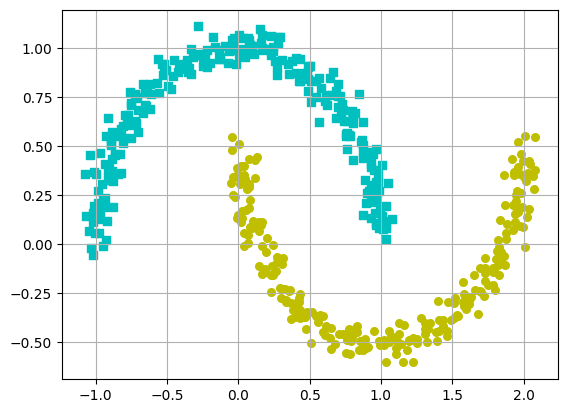

<ipython-input-105-3b630c4e65bf>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


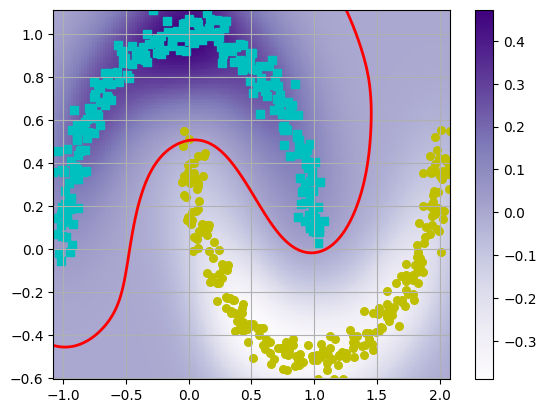

<ipython-input-105-3b630c4e65bf>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


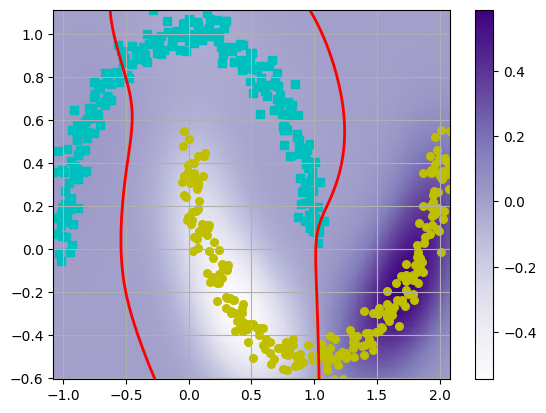

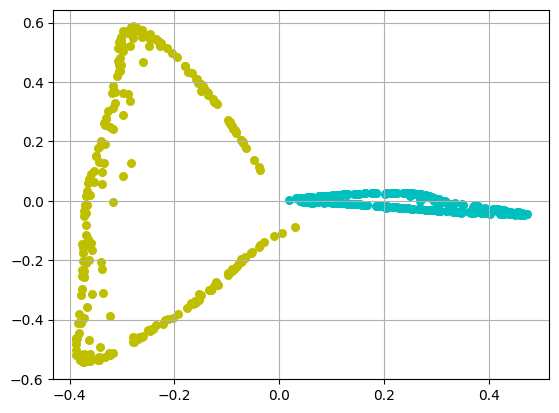

[-0.38805342333371673,
 0.47242241493706577,
 -0.5441903324937353,
 0.5867378766431535]

In [105]:
import numpy as np
from sklearn.svm import LinearSVC as Classifier
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:
            conts = sorted([-1+eps,0,1-eps])

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        vmin,vmax=np.min(z)-eps,np.max(z)+eps
        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    if not hold:
        plt.grid()
        plt.show()
    return extent



# Step 1: Create the dataset
from sklearn.datasets import make_circles, make_moons
from sklearn.decomposition import KernelPCA

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)
X, y =  make_moons(n_samples=500, noise=0.05, random_state=42)

# Step 2: Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=12).fit(X)
X_kpca = kpca.transform(X)

# Step 3: Define the inverse transform decision function correctly
def projection_function_1(t):
    """
    This function calculates the projection of points along the second component of
    the kernel PCA-transformed space and returns the second dimension values.
    """
    t_transformed = kpca.transform(t)  # Use the original points without fixing the first dimension
    return t_transformed[:, 1]  # Use the second dimension for contouring

def projection_function_0(t):
    """
    This function calculates the projection of points along the first component of
    the kernel PCA-transformed space and returns the first dimension values.
    """
    t_transformed = kpca.transform(t)  # Use the original points without fixing the first dimension
    return t_transformed[:, 0]  # Use the first dimension for contouring

# Plot 1: Projection curve in the original feature space
plotit(X,y,clf=None, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('s', 'o'))

plotit(X,y,clf=projection_function_0, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('s', 'o'))
plotit(X,y,clf=projection_function_1, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('s', 'o'))
plotit(X_kpca,y, clf=None, conts=[0], ccolors=('r',), colors=('c', 'y'), markers=('o',))

In [80]:
np.min(X_kpca,axis=0)

array([-0.39535567, -0.54204433])

In [81]:
np.max(X_kpca,axis=0)

array([0.47394928, 0.57915402])